<a href="https://colab.research.google.com/github/coder178/ML_Sem6/blob/main/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast',
'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

#Converting string labels into numbers
Outlook_encoded = le.fit_transform(Outlook)
OutlookMapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Outlook mapping:",OutlookMapping)

Temperature_encoded = le.fit_transform(Temperature)
TemperatureMapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Temperature mapping:",TemperatureMapping)

Humidity_encoded = le.fit_transform(Humidity)
HumidityMapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Humidity mapping:",HumidityMapping)

Wind_encoded = le.fit_transform(Wind)
WindMapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Wind mapping:",WindMapping)

Play_encoded = le.fit_transform(Play)
PlayMapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Play mapping:",PlayMapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)


Outlook mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
#Merge different features to prepare dataset
features = list(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print(features)
label = list(zip(Play_encoded))


[(1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1)]


In [ ]:
#Create a Decision Tree Classifier (using Entropy)
# Train the model using the training sets
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy",random_state=0)
model.fit(features,label)
#Predict Output
model.predict([[2,1,0,1]])

array([0])

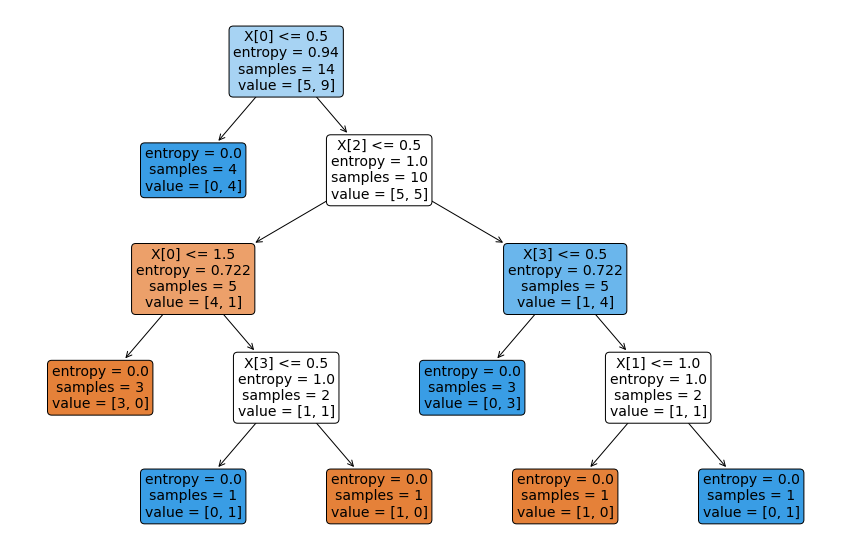

In [ ]:
#Display Decsion Tree Created
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
a = tree.plot_tree(model, rounded=True, filled=True, fontsize=14)
plt.show()

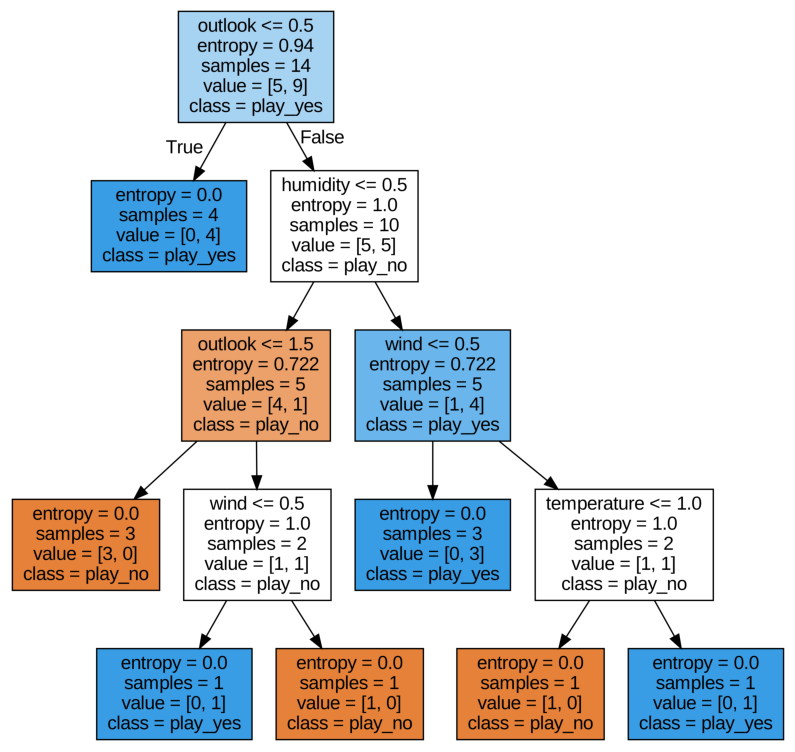

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='tree_entropy.dot',
feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'], filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

#Exercise

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
datasets = list(zip(Outlook,Temperature,Humidity,Wind))
print(datasets)
onehotencoder = OneHotEncoder()
Outlook_onehot = onehotencoder.transform(datasets.Outlook).toarray()
print(Outlook_onehot);

[('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True')]


AttributeError: ignored

#CostComplexityPrunning





In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=0)


clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)


[0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]


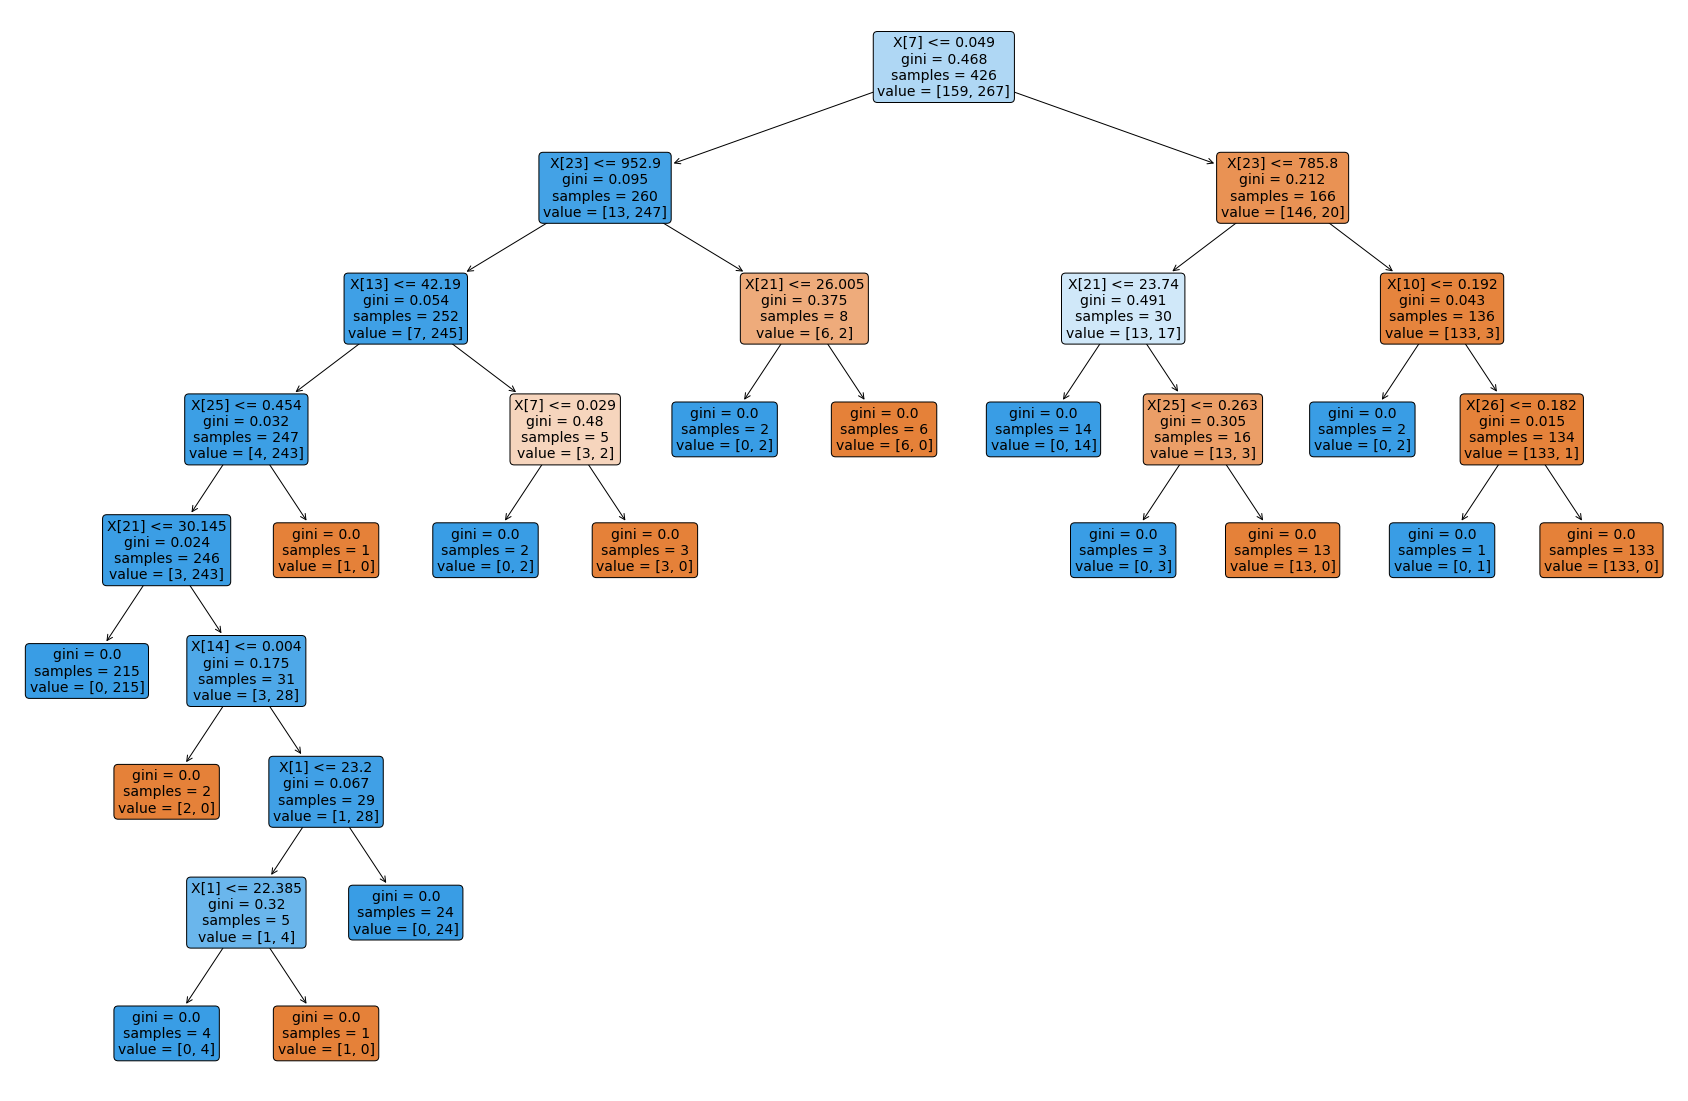

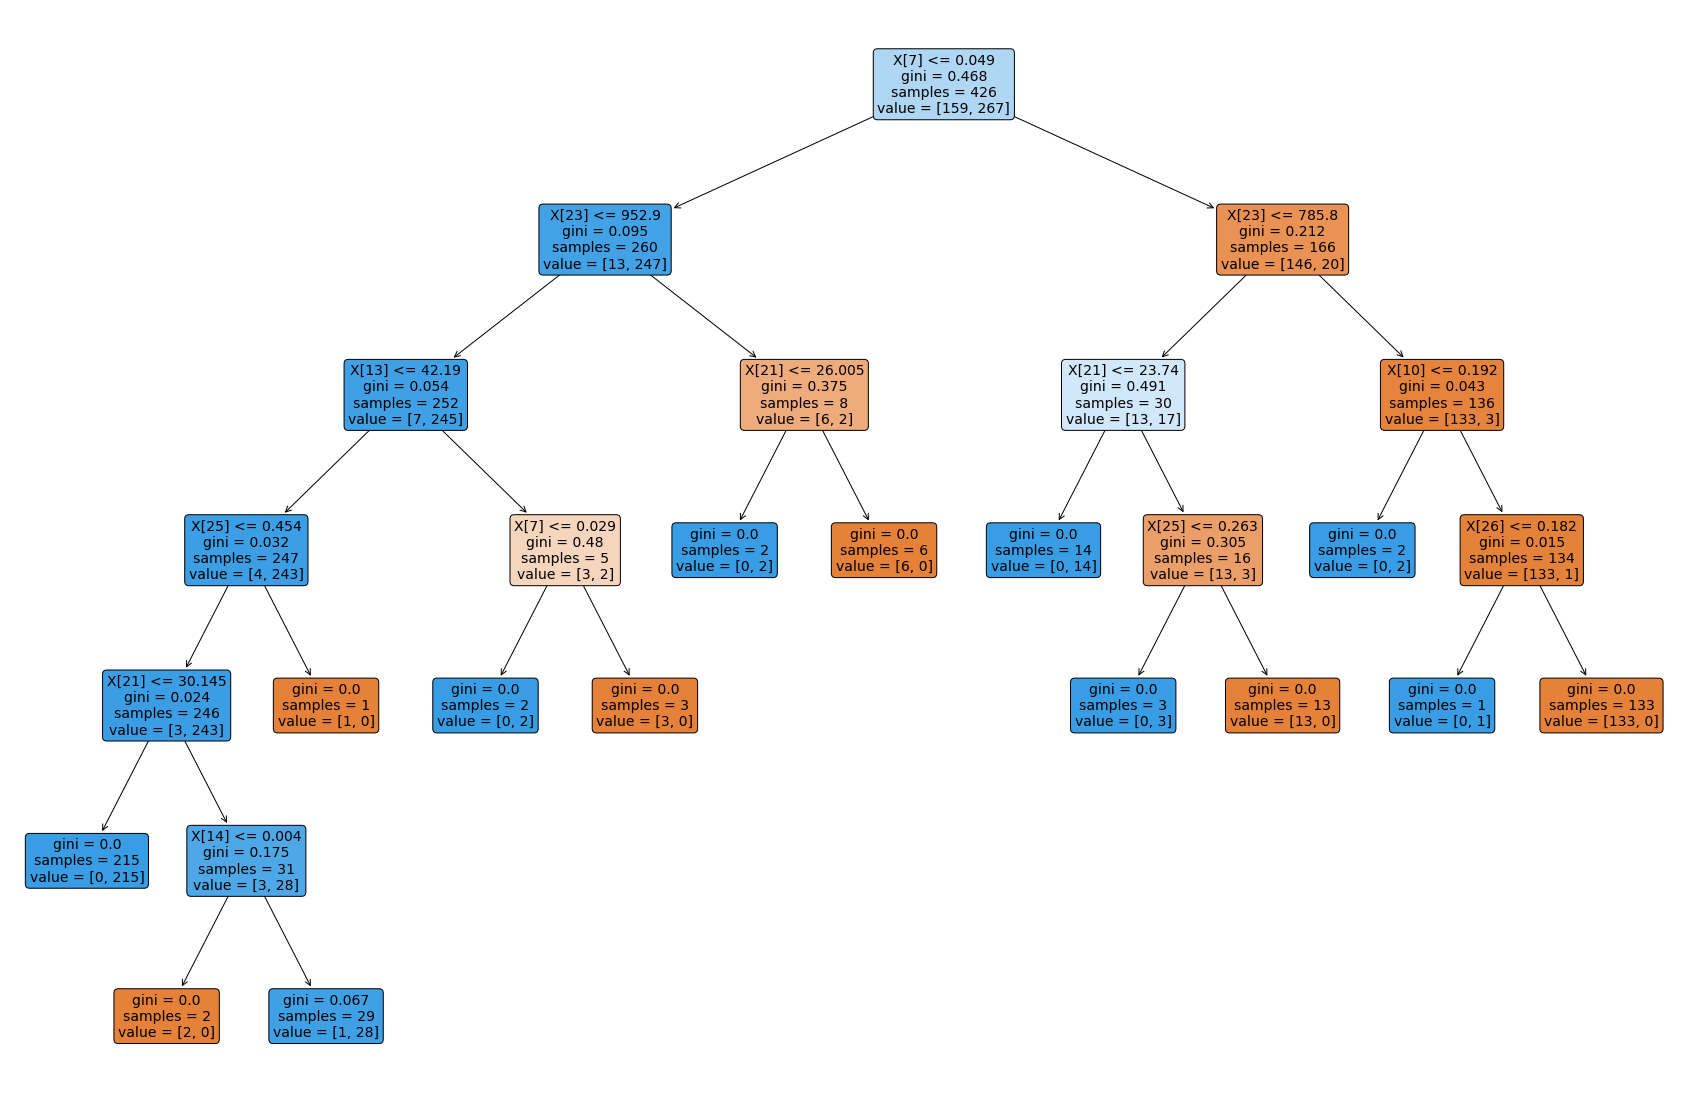

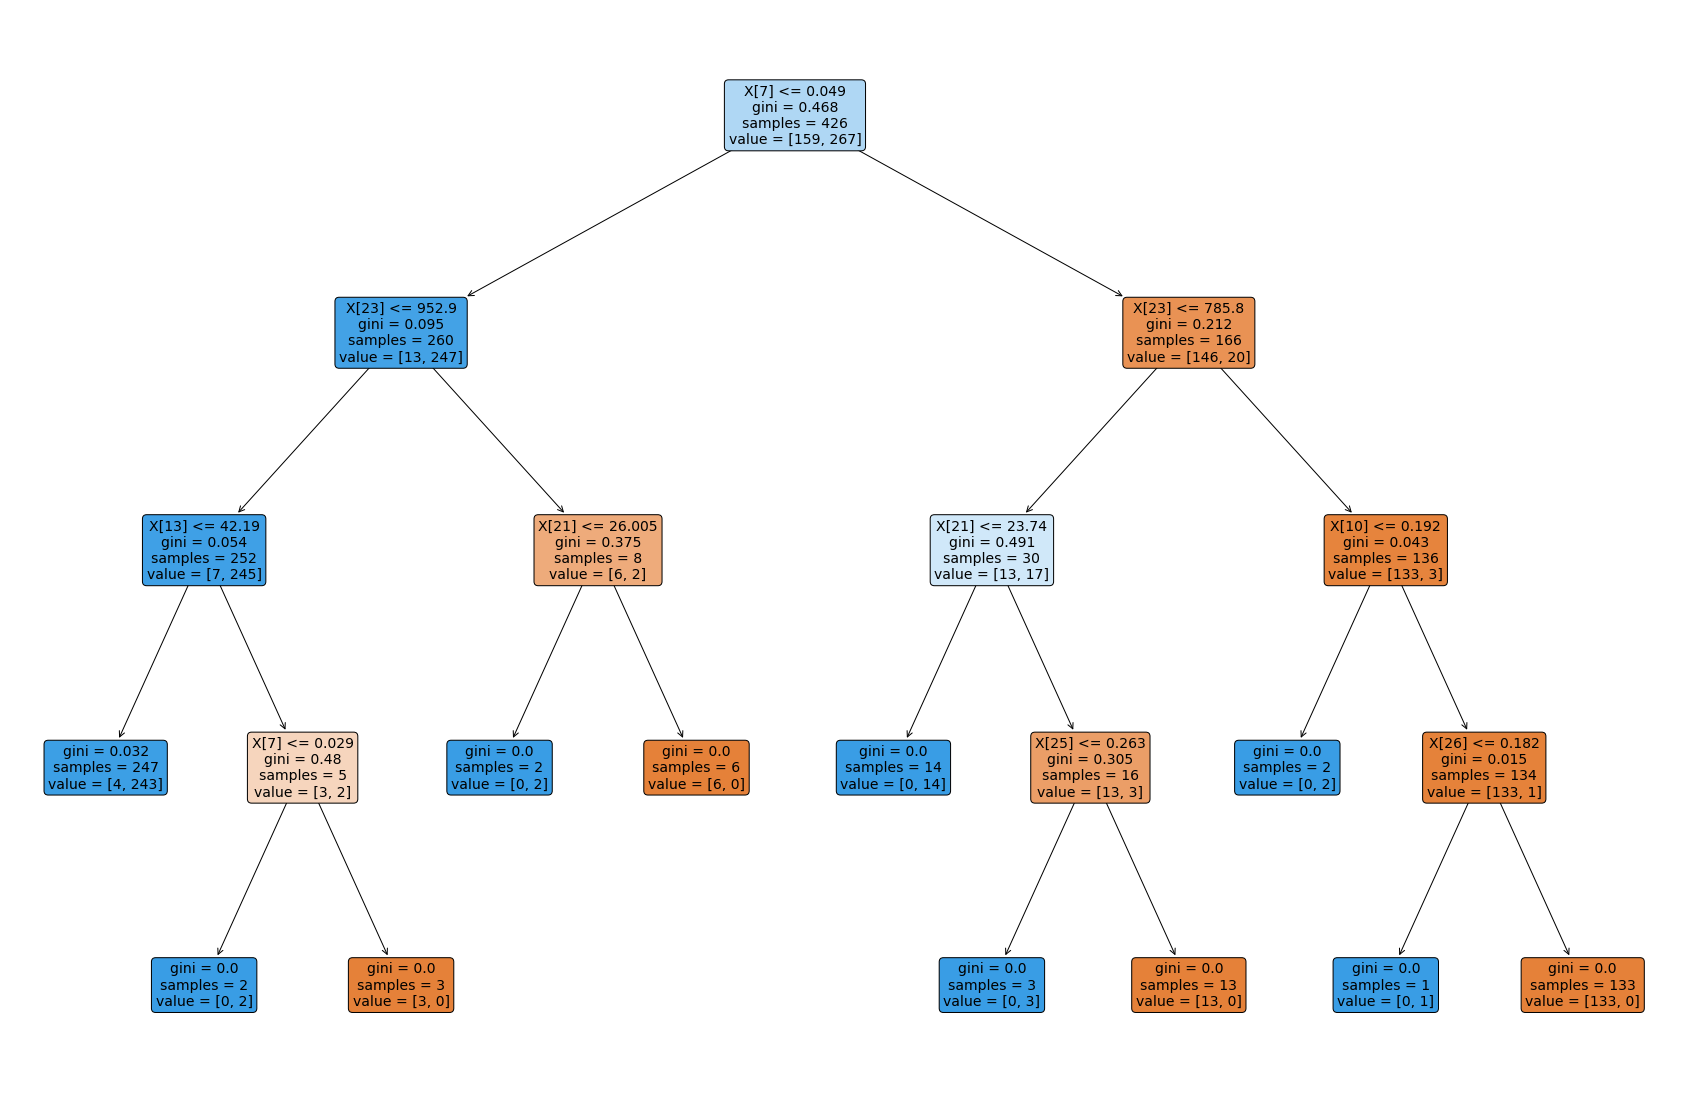

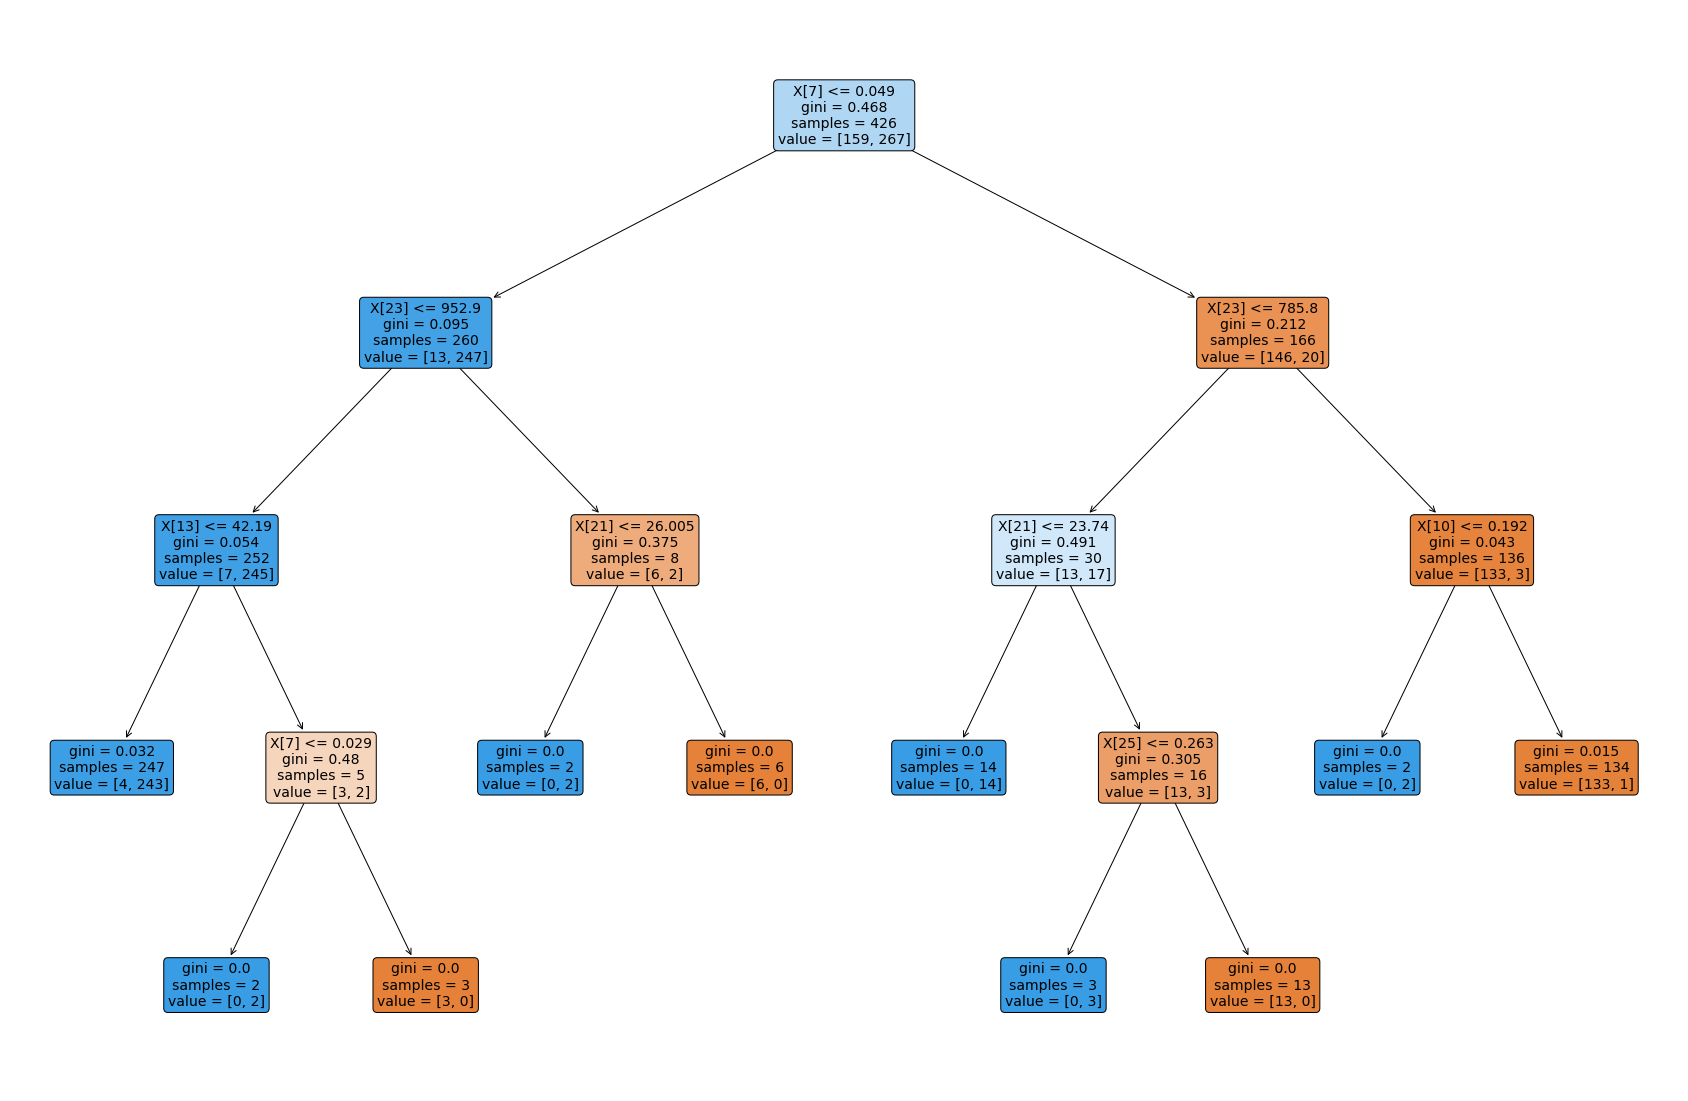

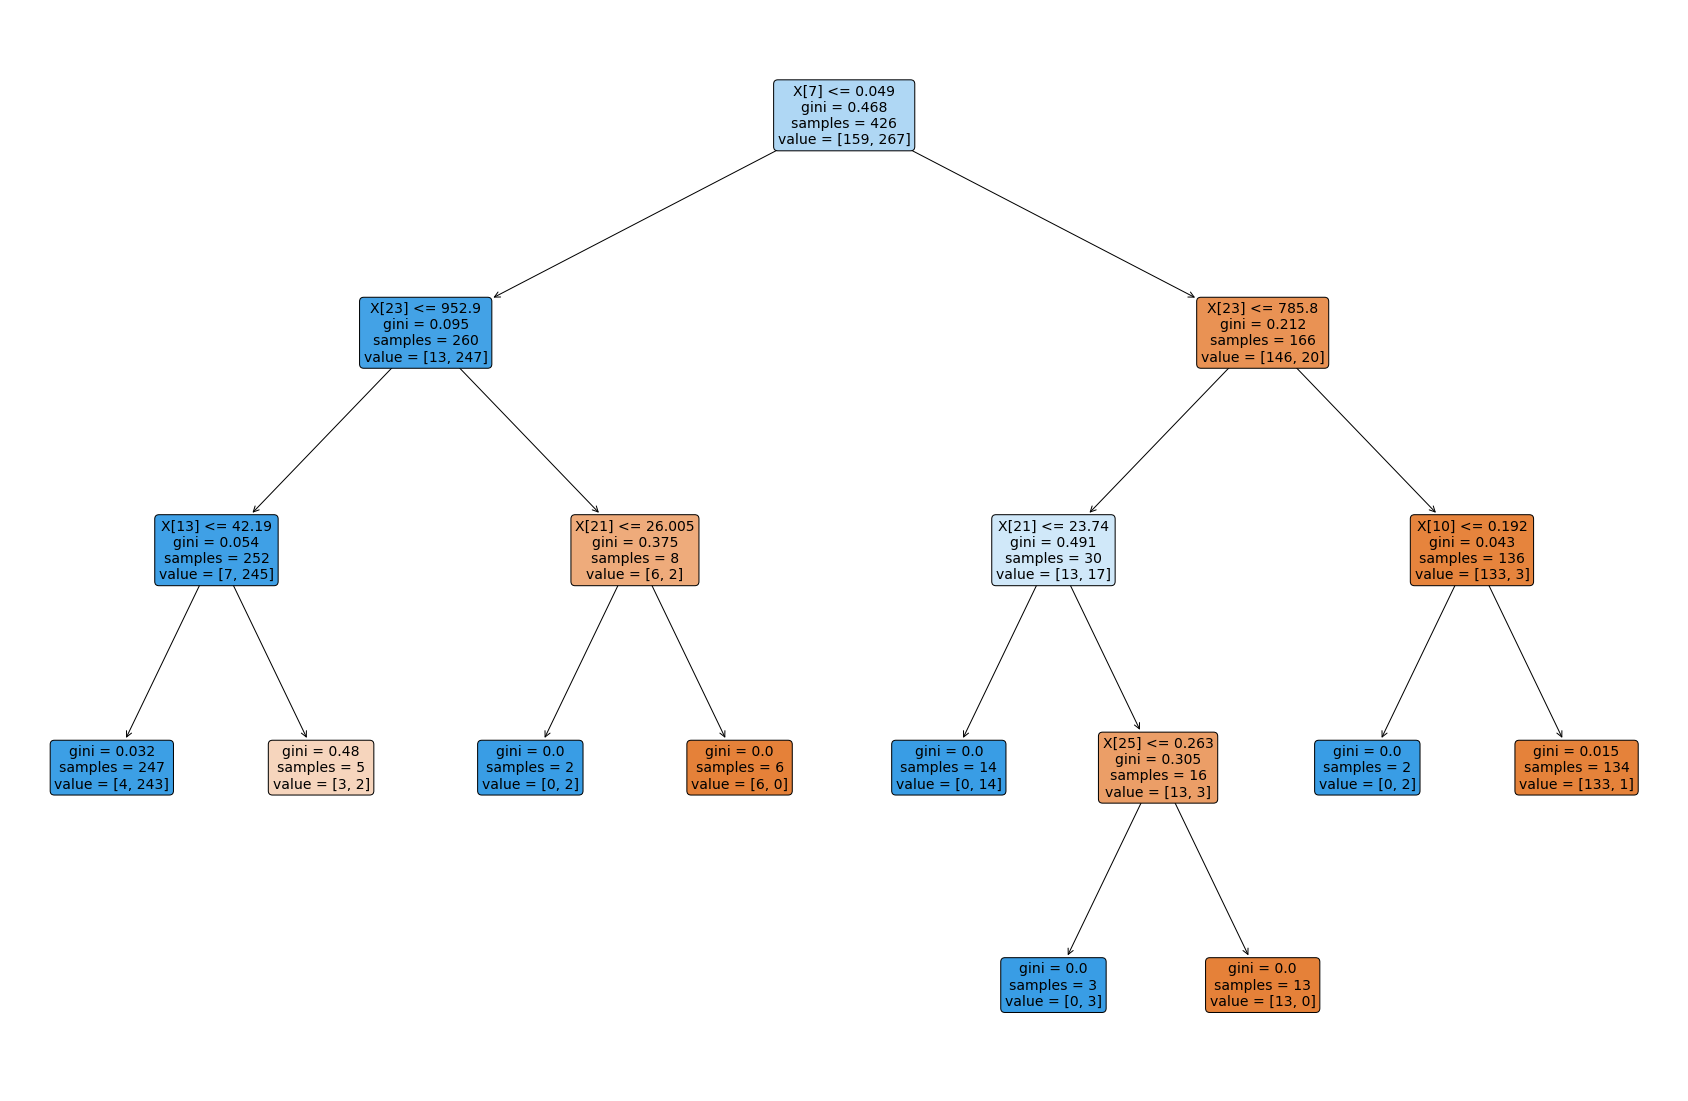

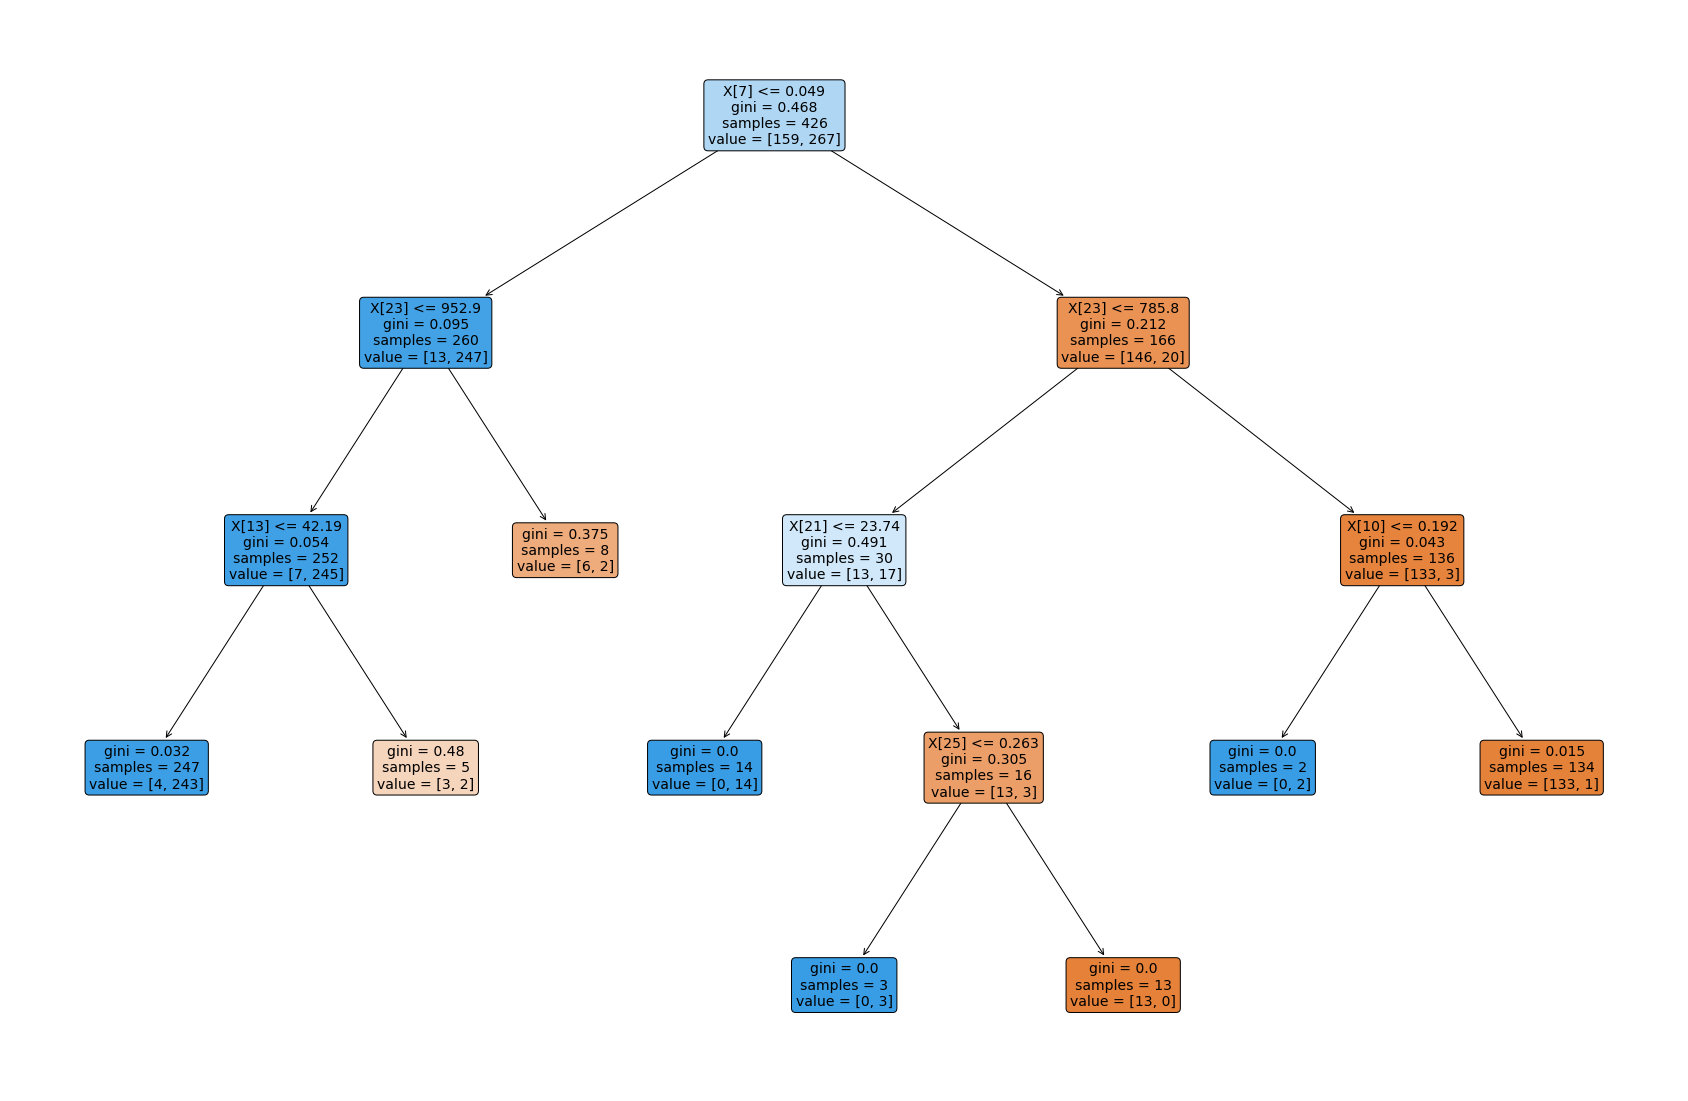

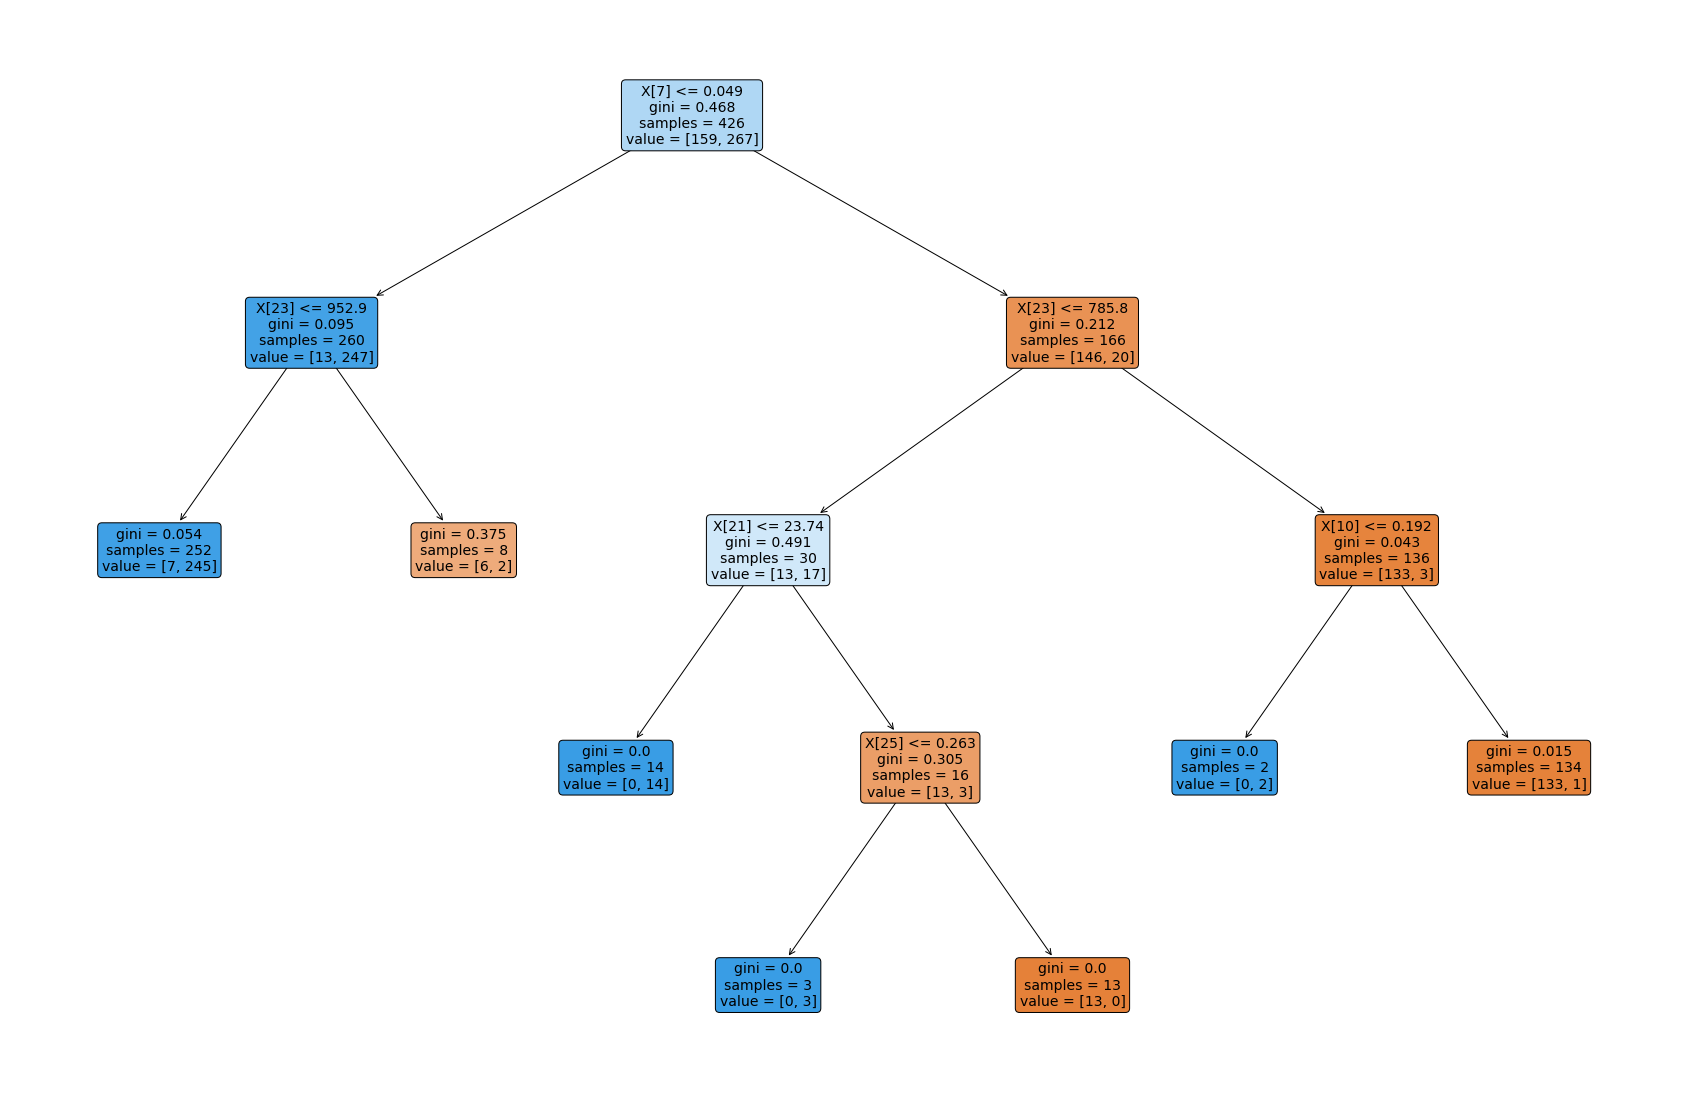

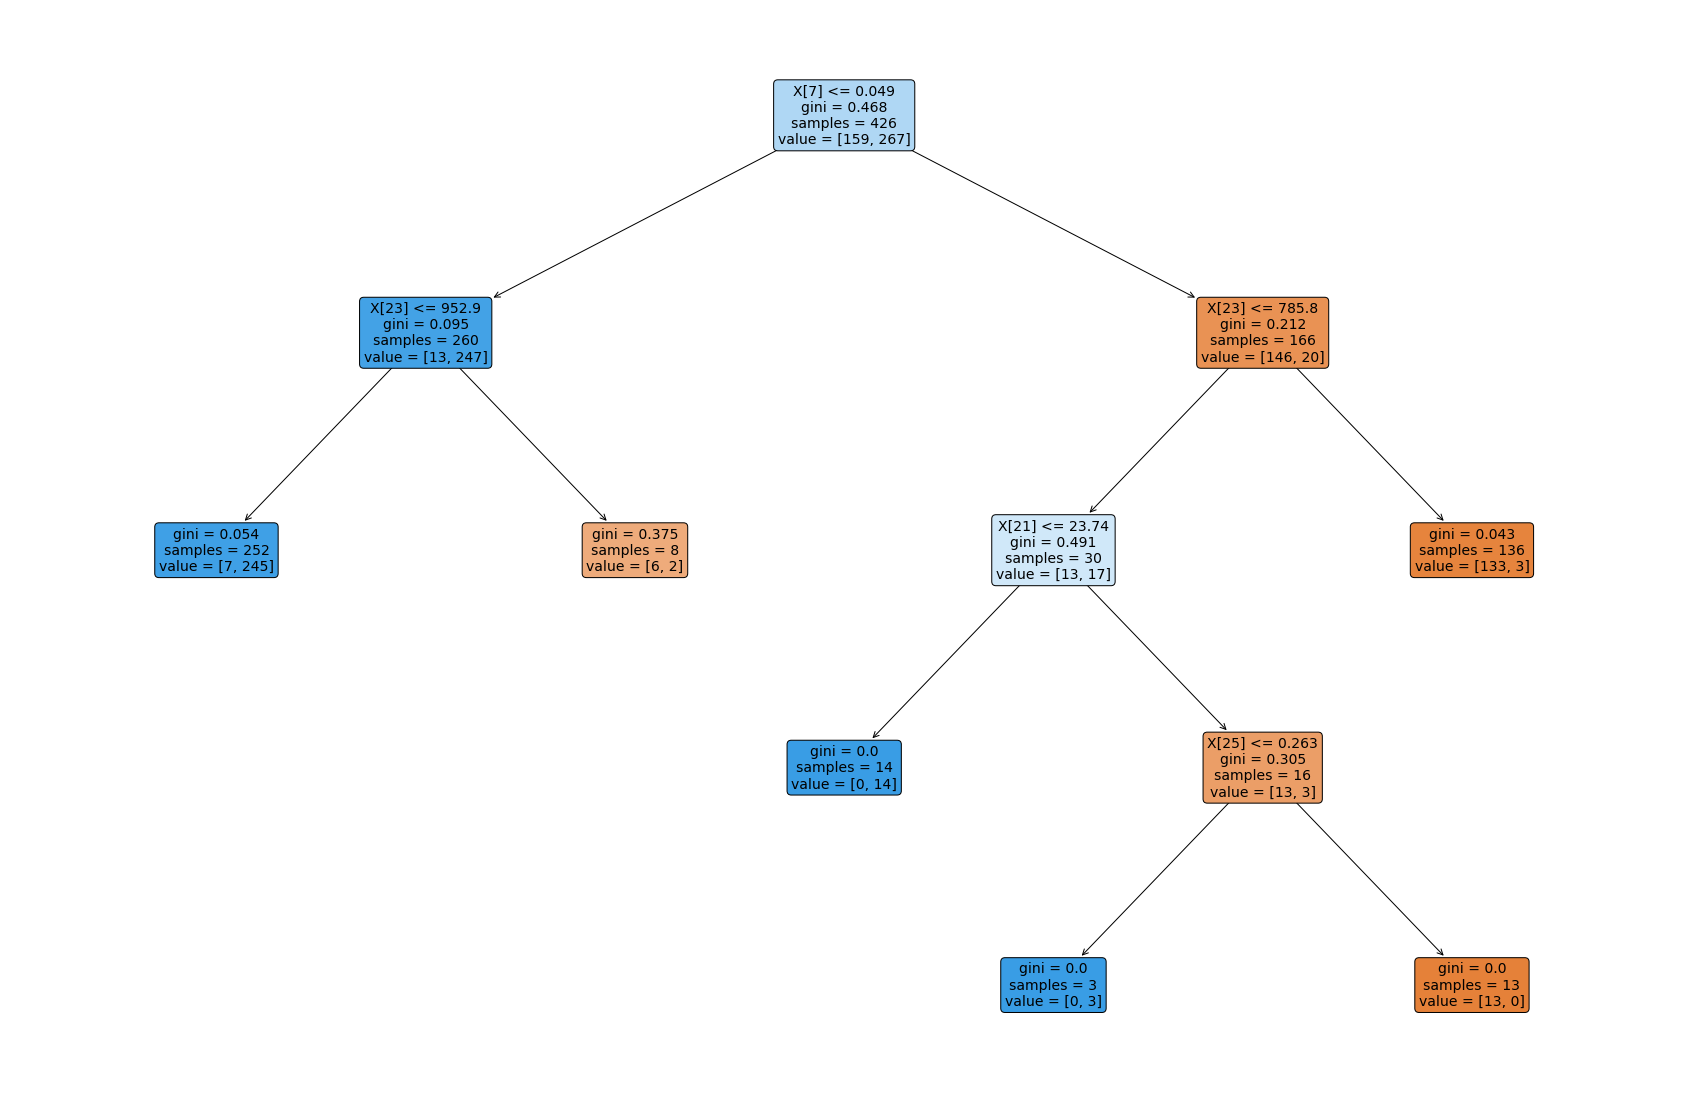

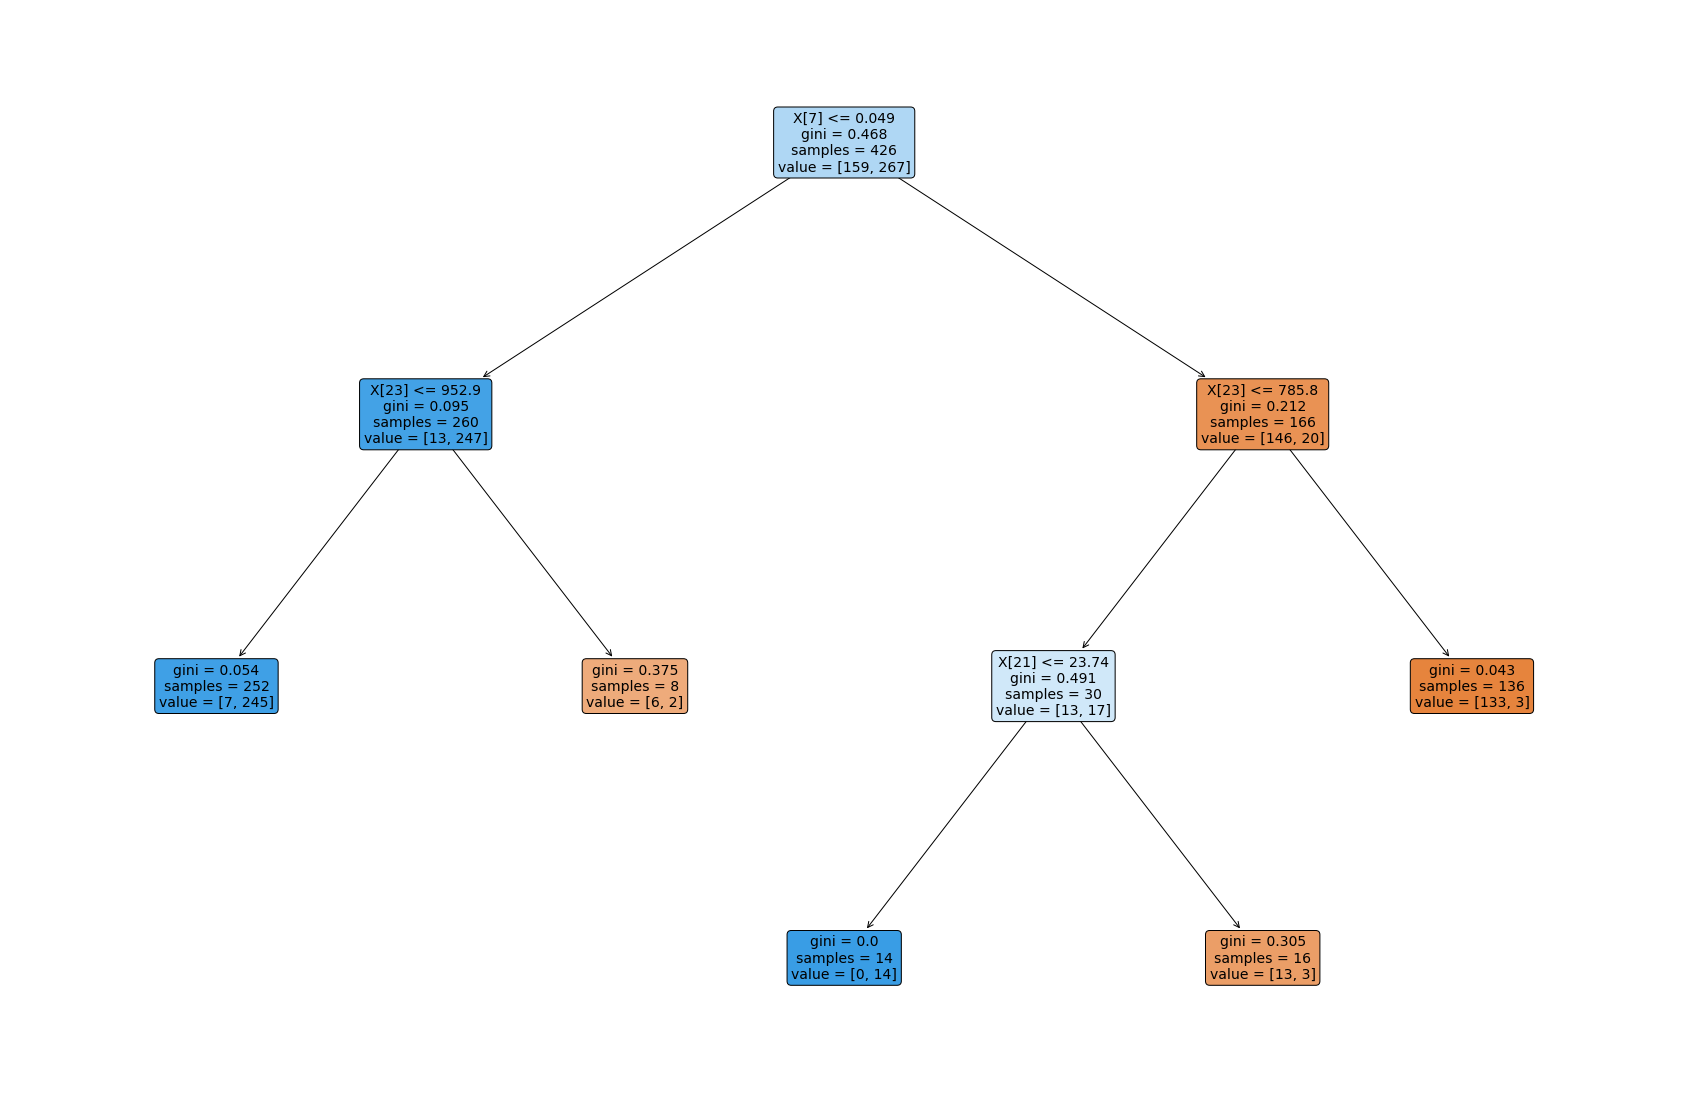

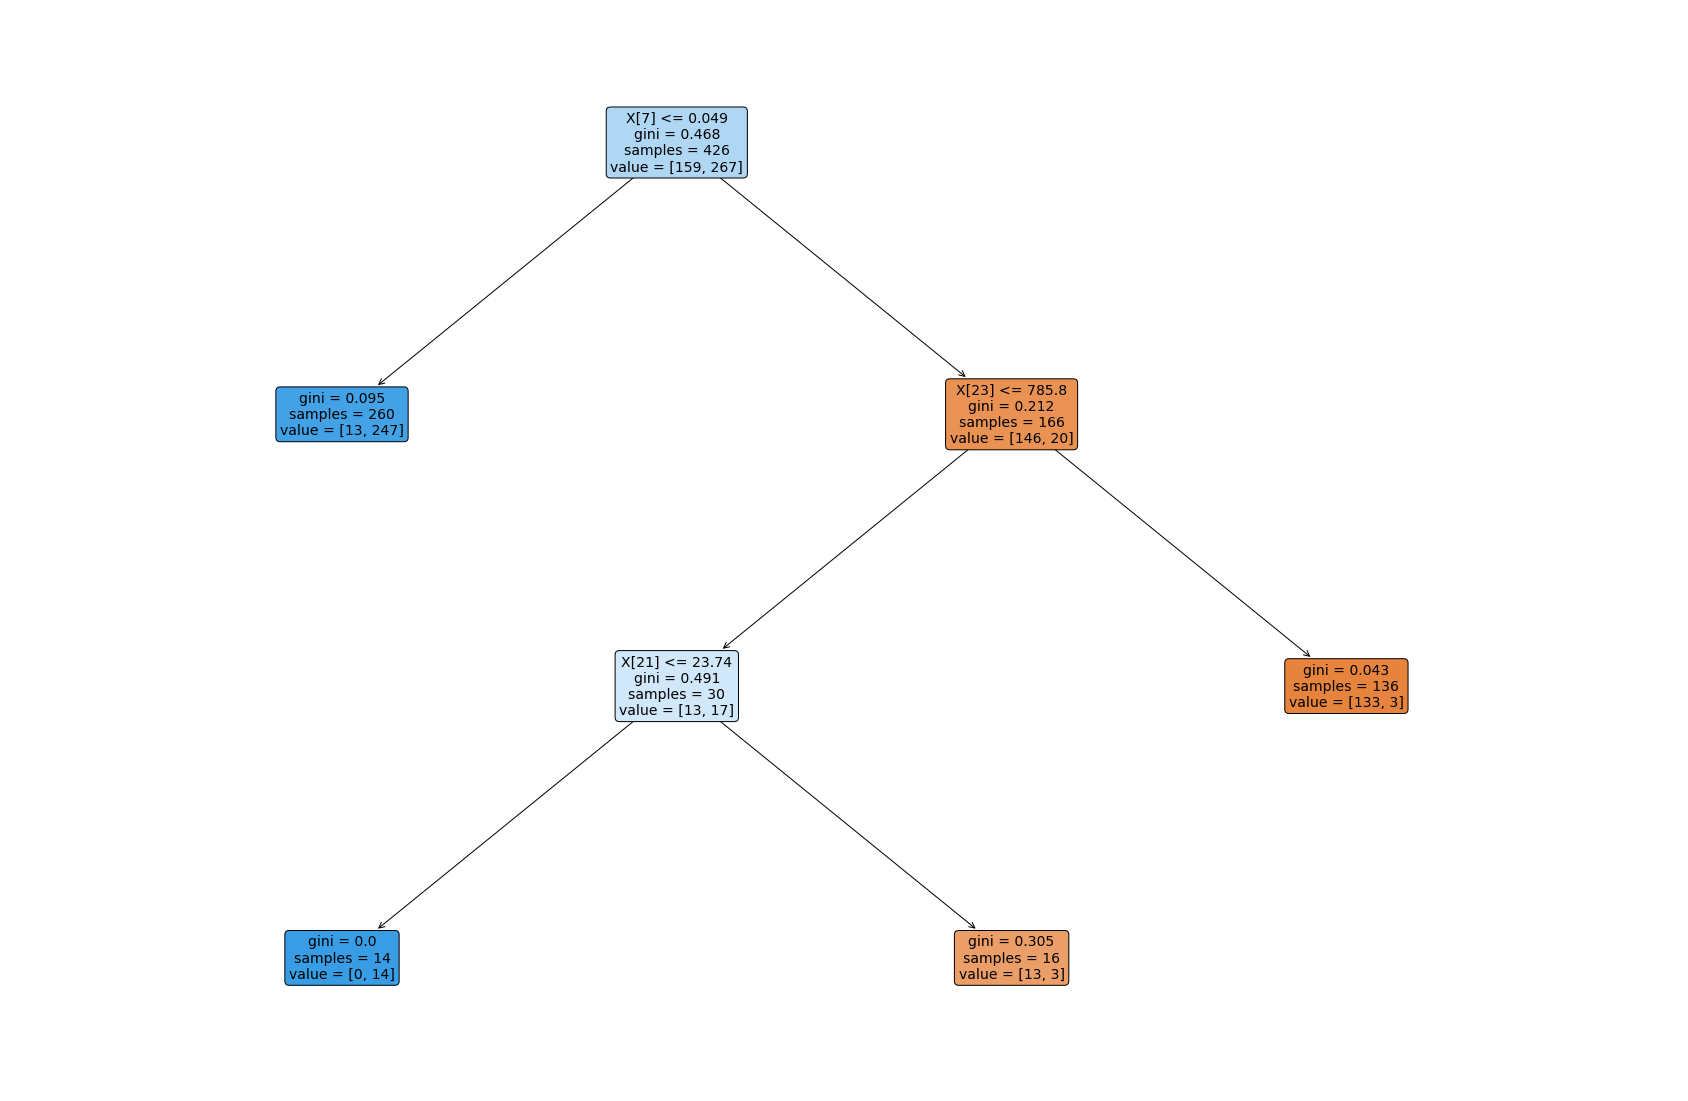

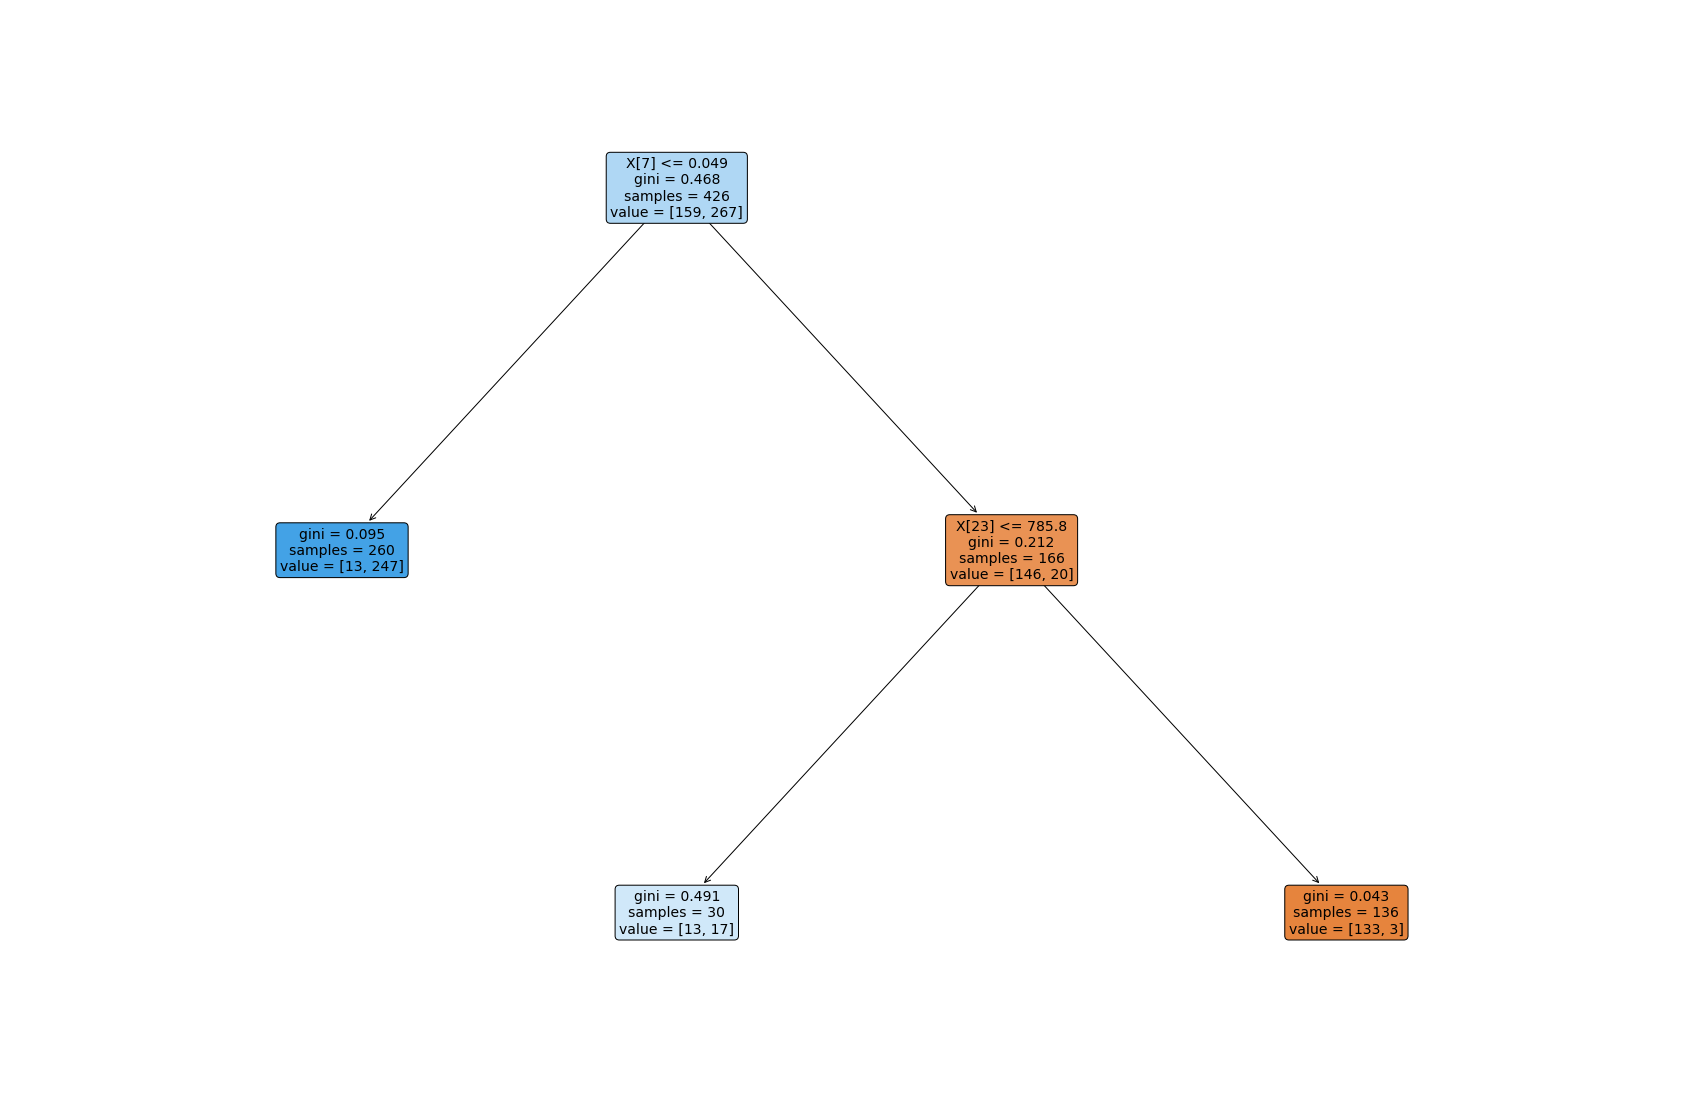

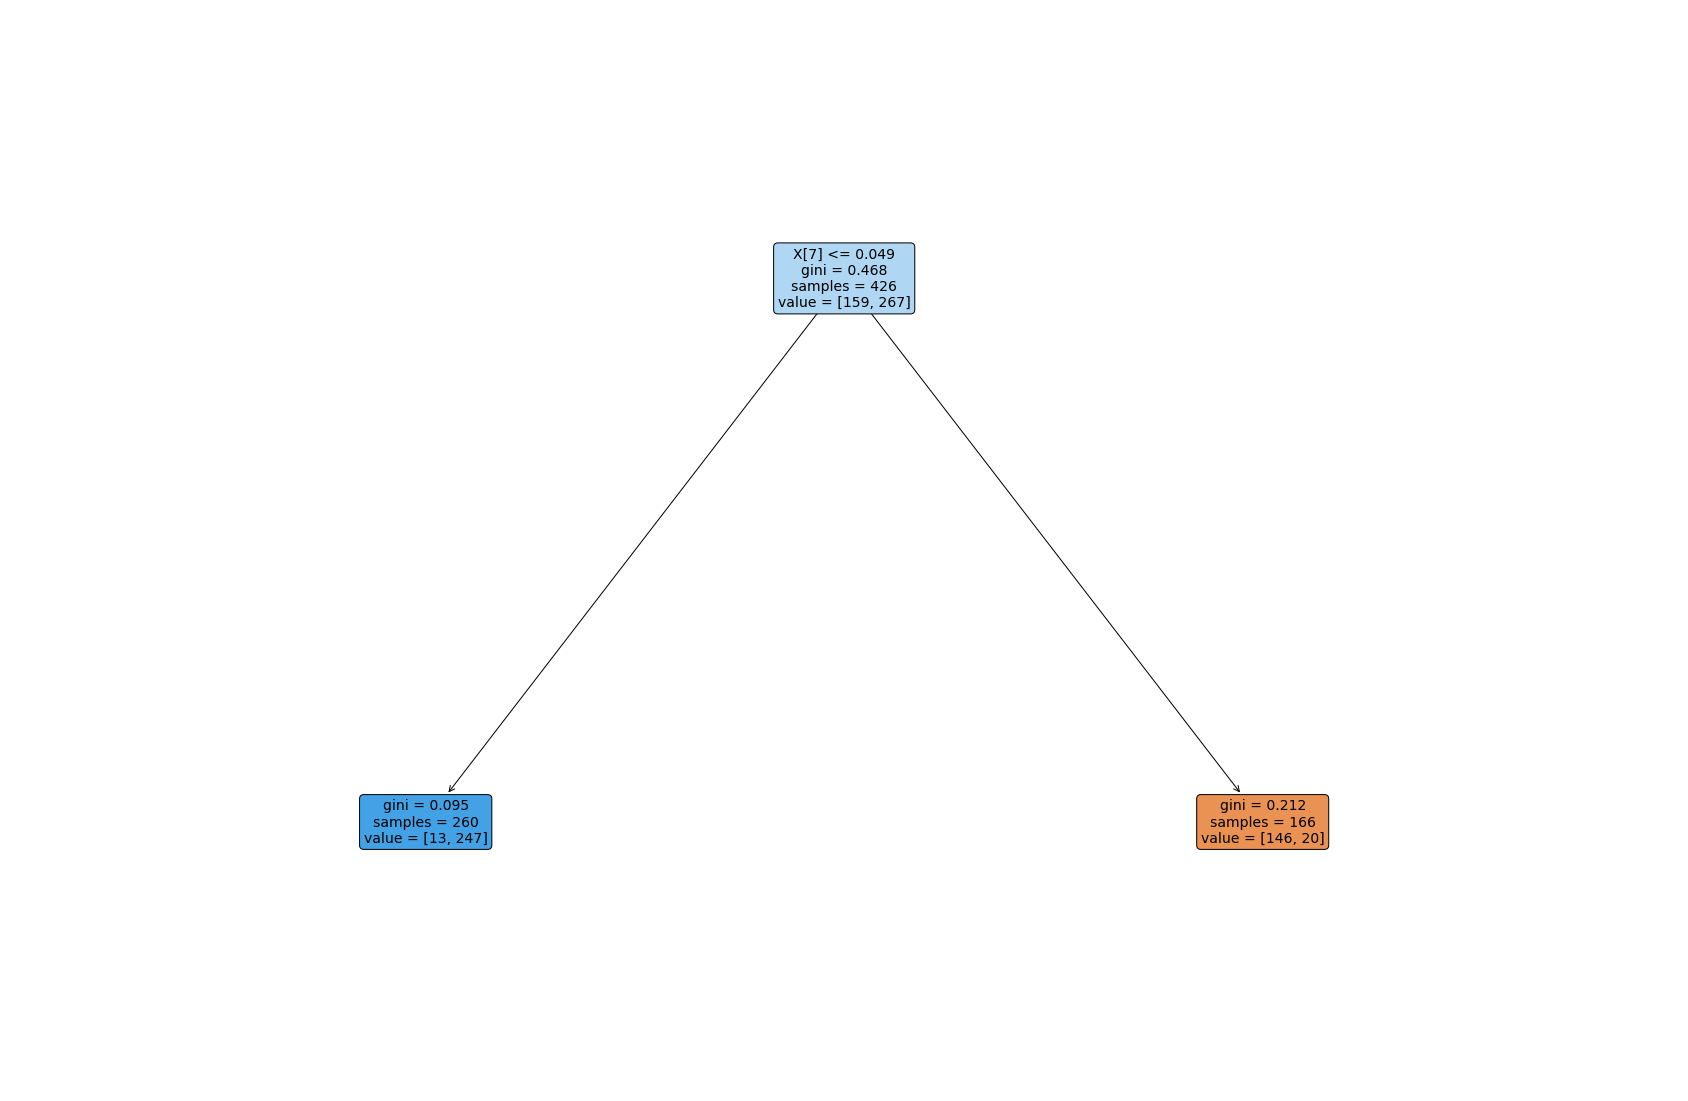

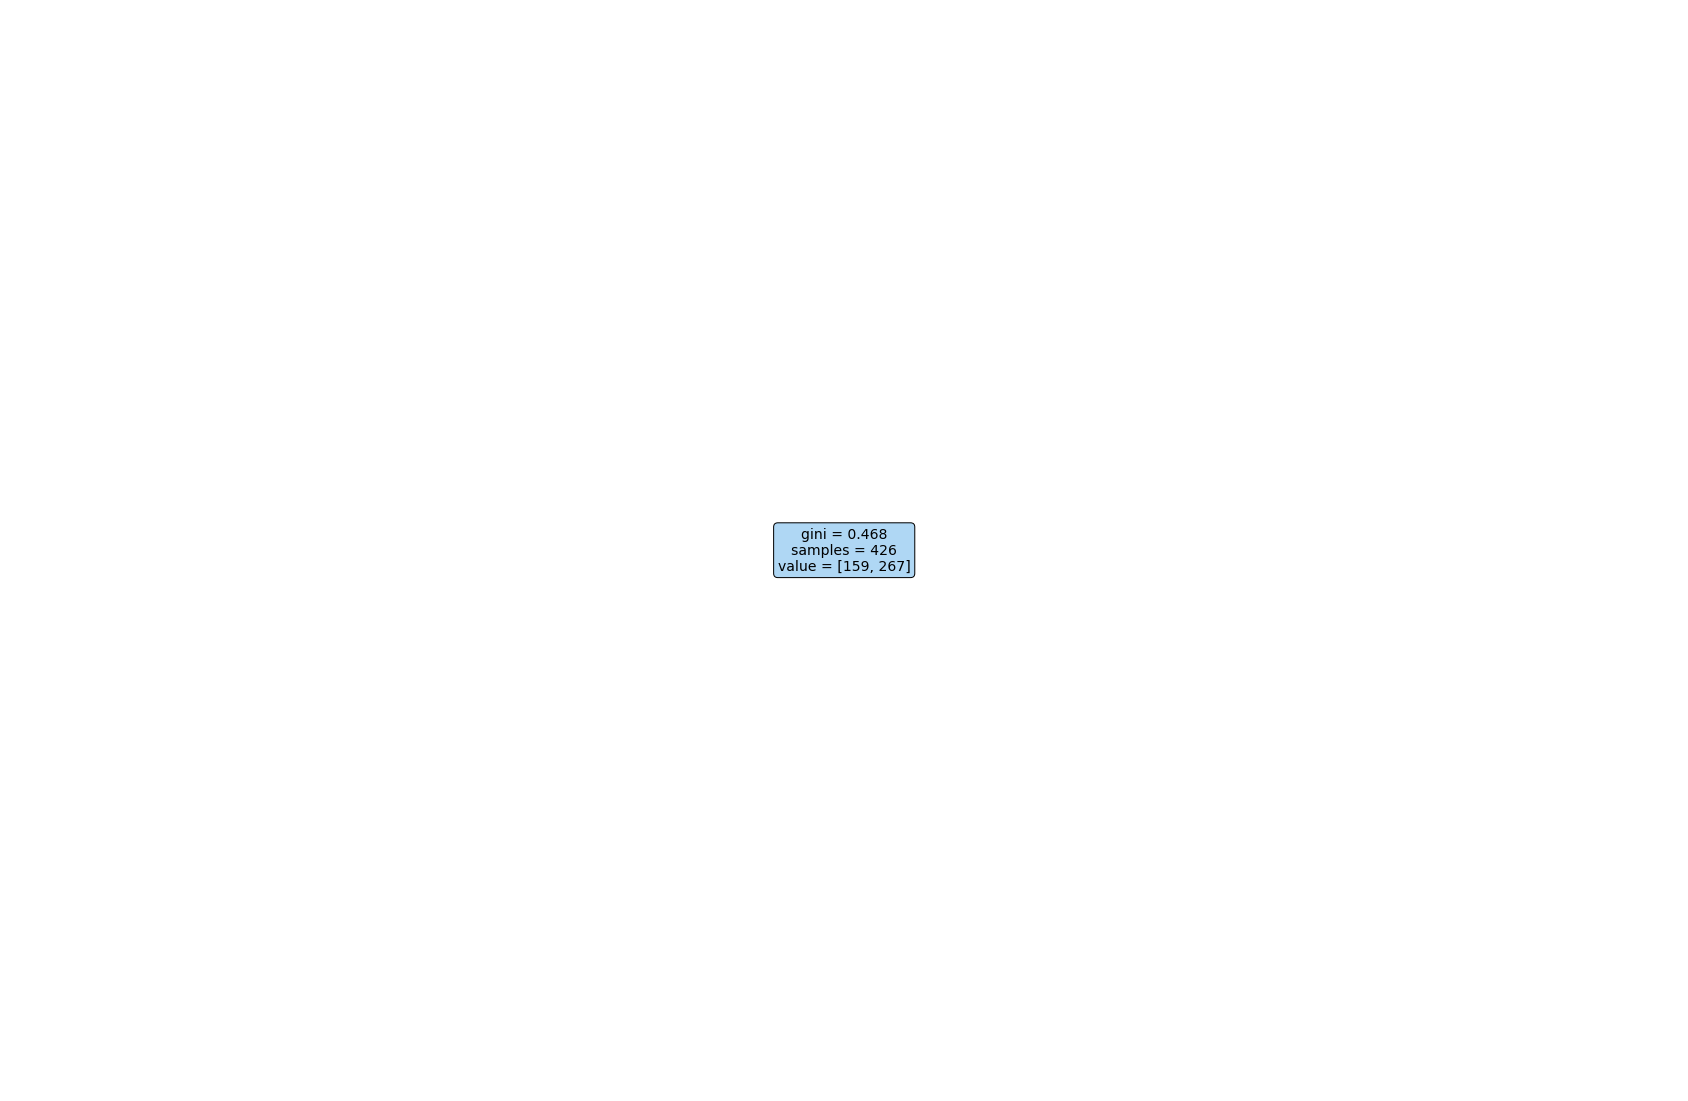

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777
Number of nodes in the tree in starting is: 31 with ccp_alpha: 0.0


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
  plt.figure(figsize=(30,20))
  a = tree.plot_tree(clf, rounded = True, filled = True, fontsize=14)
  plt.show()
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]
)
)
print("Number of nodes in the tree in starting is: {} with ccp_alpha: {}".format(clfs[0].tree_.node_count, ccp_alphas[0]))

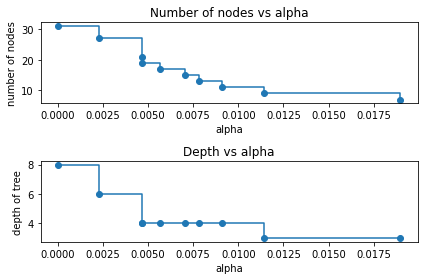

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


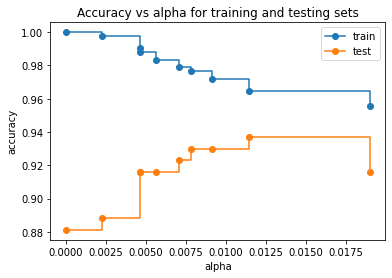

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
clf1 = DecisionTreeClassifier(ccp_alpha=0.0125, criterion='gini')
path1 = clf1.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas1 = path1.ccp_alphas

print(ccp_alphas1)

[0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]



For Training Data



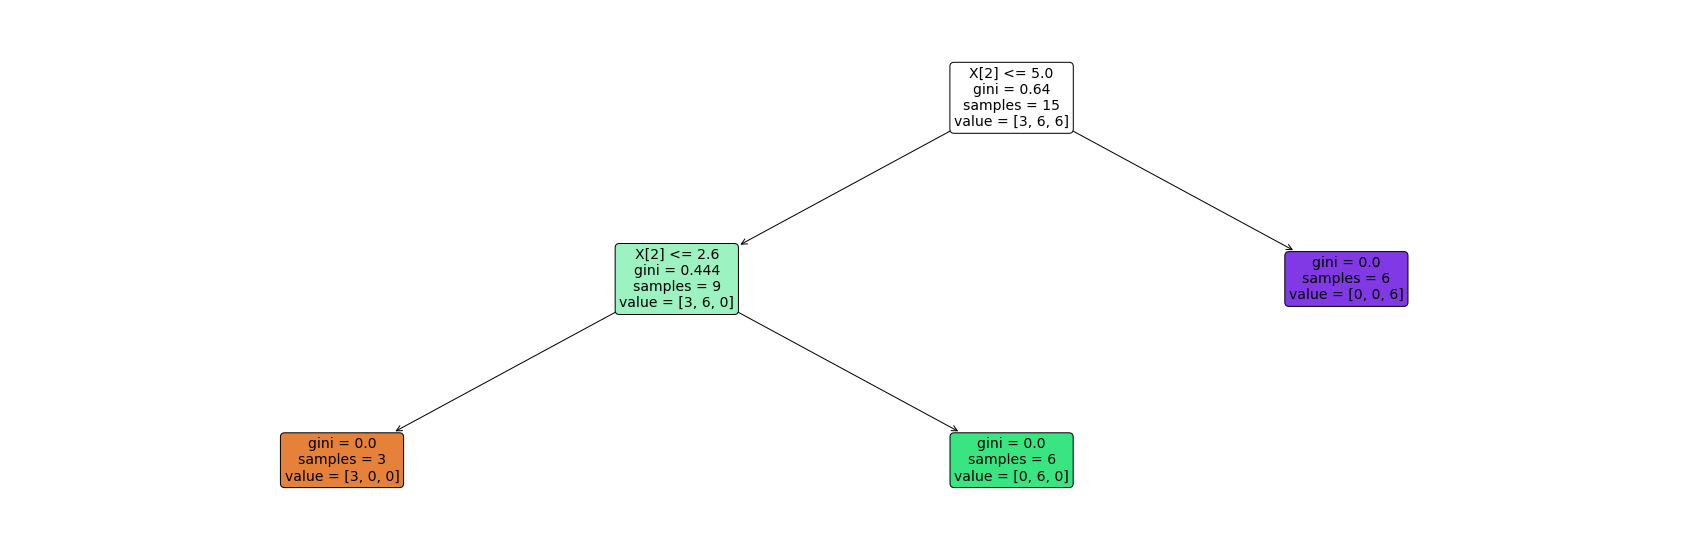

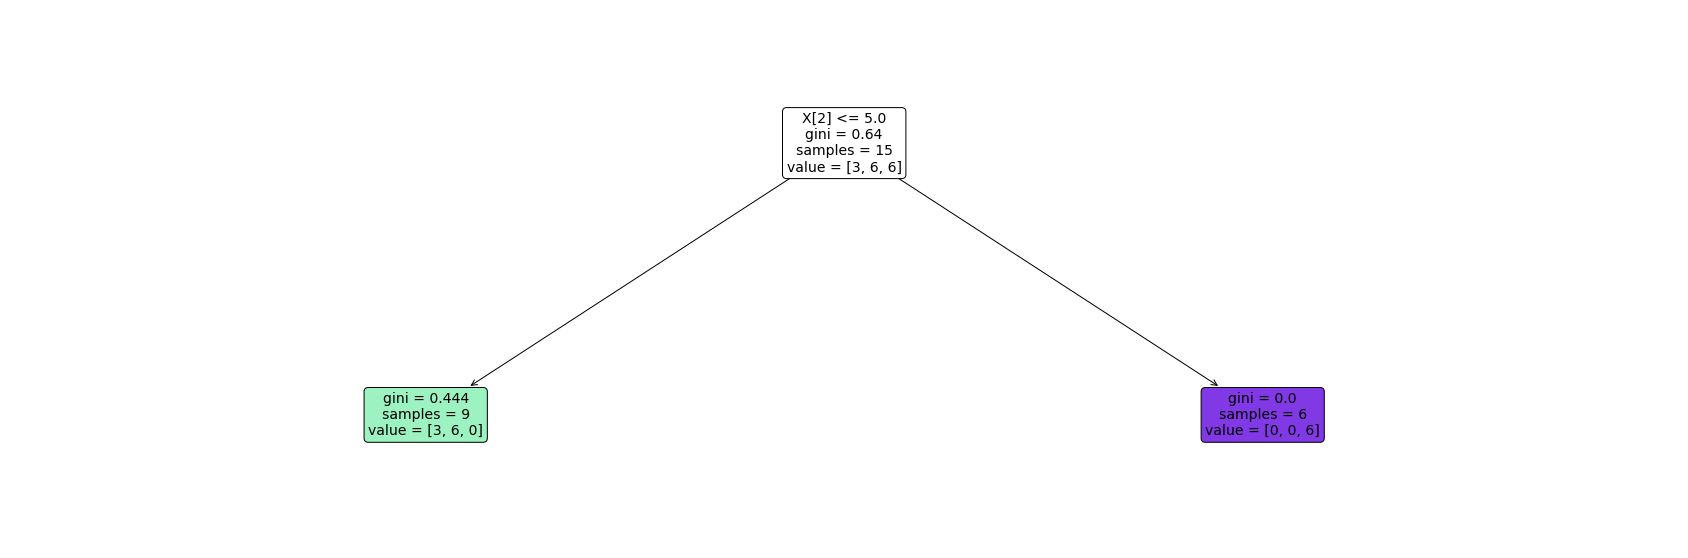

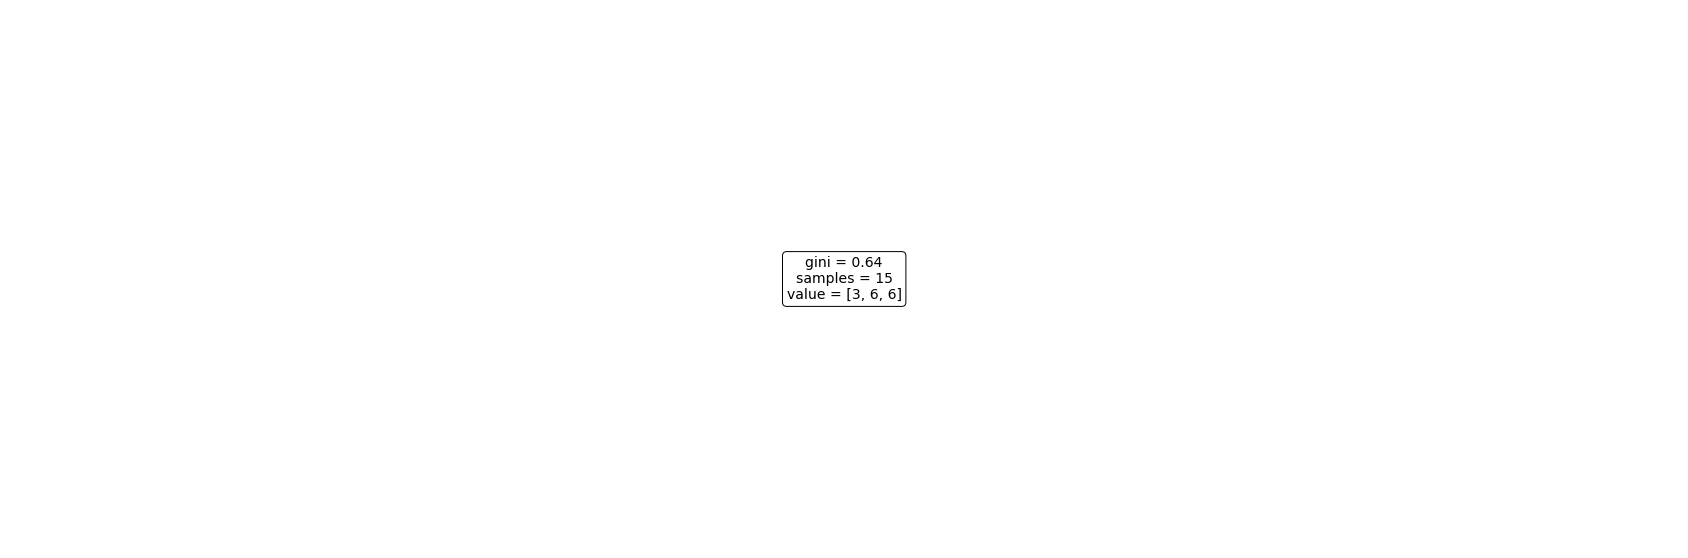


For Test Data



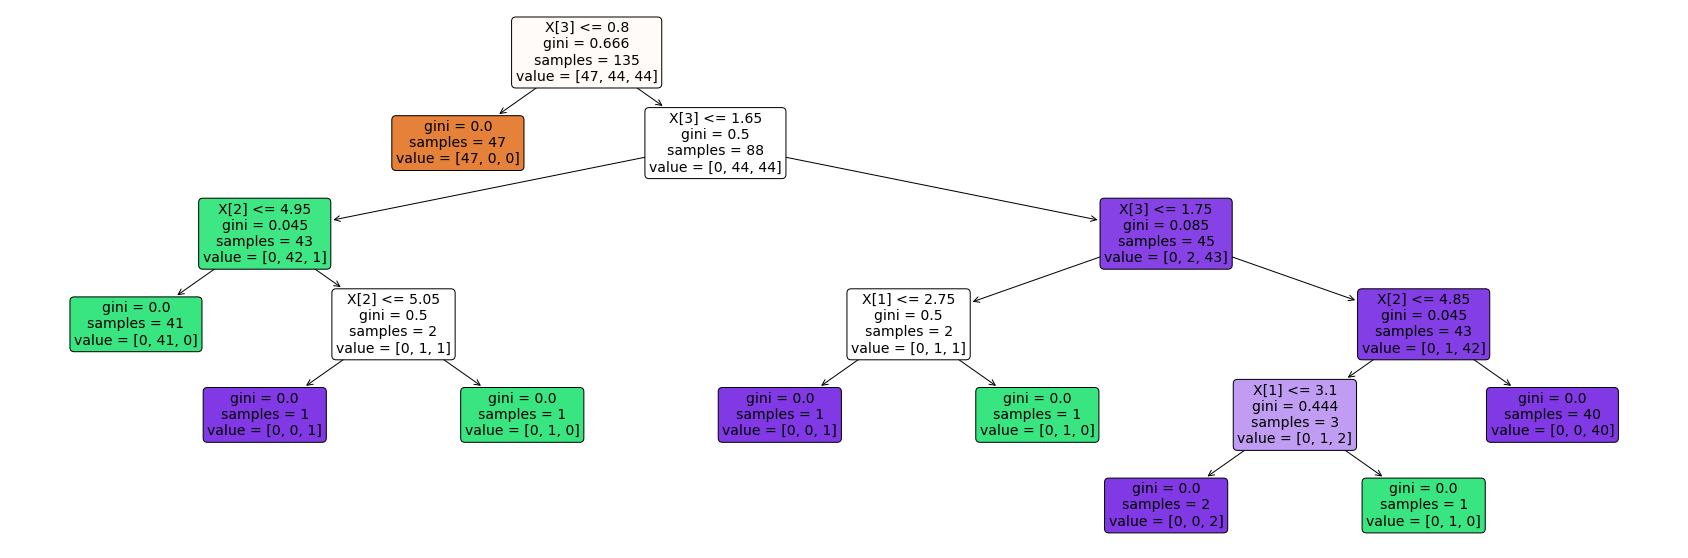

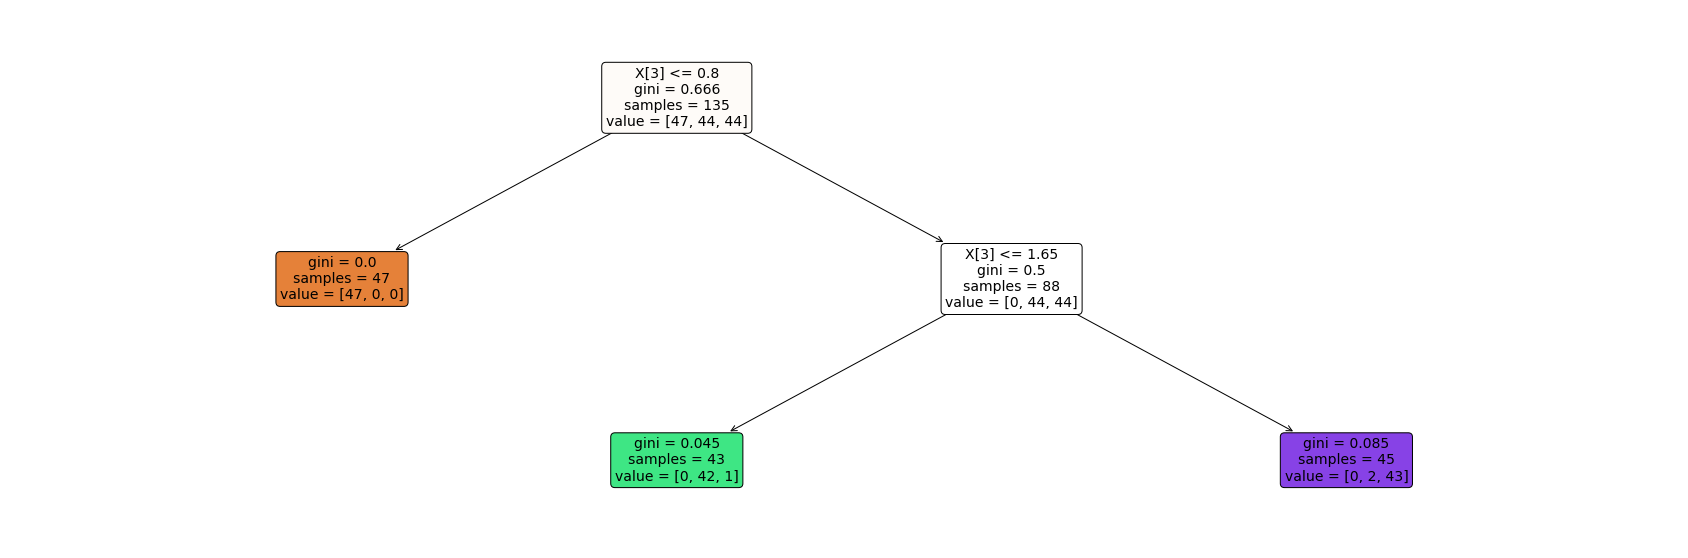

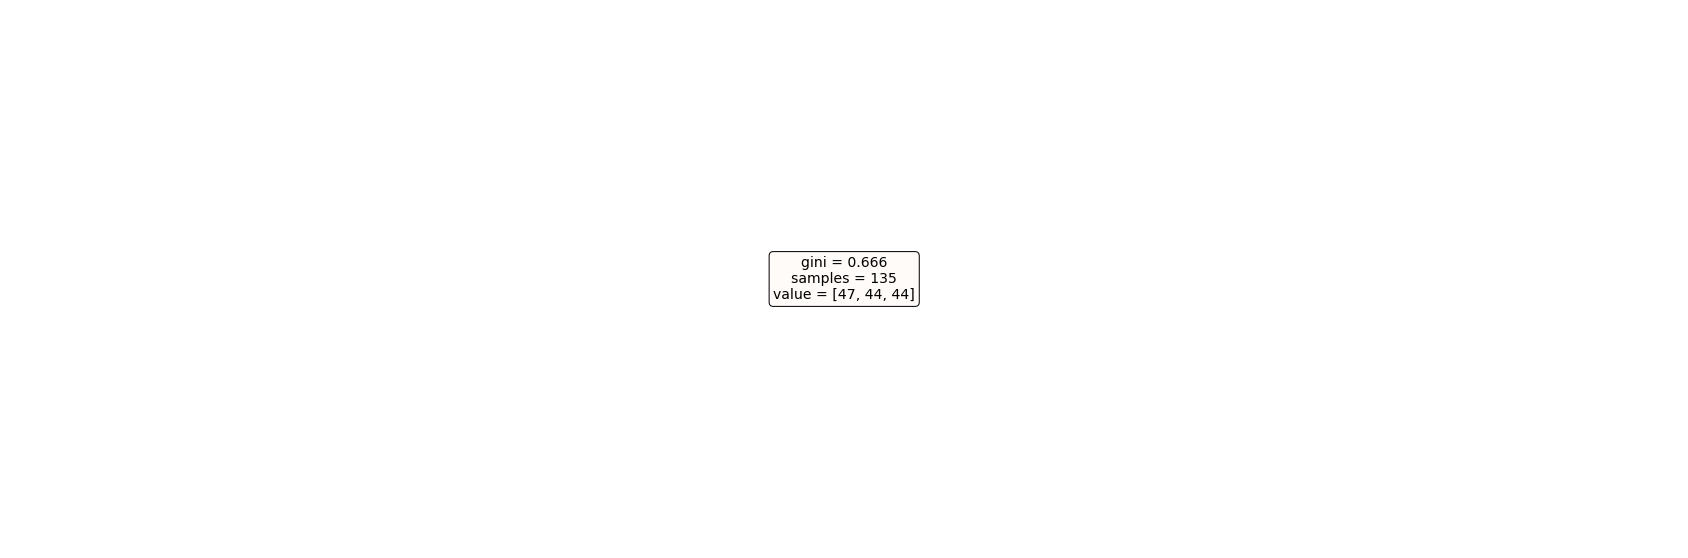

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris

_feature, _label = load_iris(return_X_y=True)
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(_feature, _label, test_size = 0.9, random_state=1)

data = load_iris()

features = np.array(data.data)
labels = np.array(data.target)

model = DecisionTreeClassifier()

path = model.cost_complexity_pruning_path(trainFeatures, trainLabels)
alphas = path.ccp_alphas

print("\nFor Training Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(trainFeatures, trainLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()

print("\nFor Test Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(testFeatures, testLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()